In [174]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Business Objectives

 This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

  Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

  If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

  In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

 To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

 



In [175]:
df=pd.read_csv('loan.csv')

In [176]:
df.shape

(39717, 111)

In [177]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [178]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [180]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,39717.0,683131.913060,210694.132915,54734.0,516221.0,665665.0,837755.0,1077501.0
member_id,39717.0,850463.559408,265678.307421,70699.0,666780.0,850812.0,1047339.0,1314167.0
loan_amnt,39717.0,11219.443815,7456.670694,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39717.0,10947.713196,7187.238670,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39717.0,10397.448868,7128.450439,0.0,5000.0,8975.0,14400.0,35000.0
...,...,...,...,...,...,...,...,...
tax_liens,39678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
tot_hi_cred_lim,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

## Data Cleaning

#### Null Value Check

In [184]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Removing the columns where all the inputs are Null


In [186]:
df= df.loc[:,df.isnull().sum()!=39717]   
df.shape

(39717, 57)

In [187]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [188]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing.loc[missing > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

#### Remove all the columns with more than 50% missing values.

In [190]:
columns_with_missing_values = list(missing[missing >= 50].index)
len(columns_with_missing_values)

3

In [191]:
df = df.drop(columns_with_missing_values,axis=1)
df.shape

(39717, 54)

####  Remove the desc column because purpose and title column will do same for the data

In [193]:
df=df.drop('desc',axis=1)
df.shape

(39717, 53)

In [194]:
df.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [195]:
df.title.nunique()

19615

In [196]:
print("unique emp_title : %d"  % len(df.emp_title.unique()))
print("unique emp_length : %d"  % len(df.emp_length.unique()))
print("unique title : %d"  % len(df.title.unique()))
print("unique revol_util : %d"  % len(df.revol_util.unique()))
print("unique title : %d"  % len(df.title.unique()))
print("unique last_pymnt_d : %d"  % len(df.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(df.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(df.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(df.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(df.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(df.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


 Columns emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly Categorical with values belonging to a range.

 Let's take a look at all the different values of these Categorical columns

In [198]:
df.emp_length.nunique()

11

In [199]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [200]:
len(df.emp_length.unique())

12

In [201]:
df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [202]:
df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [203]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [204]:
df.tax_liens.unique()

array([ 0., nan])

 The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis.
     
  We can decide to drop these columns for analysis.

In [206]:
drop_list = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']

In [207]:
df=df.drop(drop_list, axis=1)

In [208]:
df.shape

(39717, 50)

 Next, lets look at the pub_rec_bankruptcies categorical column with 1.76% missing data.
     
 It tells us about the past number of public record bankruptcies of that borrower.

In [210]:
df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

 pub_rec_bankruptcies can be seen to have taking values like [0,1,2].

 Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case.

 While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values.
     
 But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [212]:
df=df[~df.pub_rec_bankruptcies.isnull()]

In [213]:
df.pub_rec_bankruptcies.isnull().sum()

0

In [214]:
df.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [215]:
missing = round(100*(df.isnull().sum()/len(df.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

 Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value and  title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respectively. 
                                                                                                                                 
 Let's remove the rows with nan/blank values for these varaibles.

In [217]:
df=df[~df.emp_title.isnull()]
df=df[~df.emp_length.isnull()]
df=df[~df.title.isnull()]
df=df[~df.revol_util.isnull()]
df=df[~df.last_pymnt_d.isnull()]

In [218]:
missing =round(100*(df.isnull().sum()/len(df.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

In [219]:
df.shape

(36433, 50)

 Now, we have now reduced the data set to have 36433 loan records and 50 attributes with no missing values.

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  object 
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status      36

In [222]:
df.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

 There are a few columns having a single unique value or all unique values.
     
 These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. 

 Some other columns are redundant.

 These columns are:

 id : is a random number given to the loan, does not contribute to analysis

 member_id : is a random number given to the member, does not contribute to analysis

 pymnt_plan : value for entire dataset is 'n', therefore can be removed.
     
 url : is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
     
 zip_code : first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis

 initial_list_status : value for entire dataset is 'f' out of the possible values, therefore can be removed.
 
 policy_code : value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
 
 application_type : value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
 
 acc_now_delinq : value for entire dataset is '0', therefore can be removed.
 
 delinq_amnt : value for entire dataset is '0', therefore can be removed.
 
 funded_amnt : value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
 
 funded_amnt_inv : value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity.
 
 Also this wont be available at the time of decision making of funding a loan.

 Dropping the above columns from the clean_loan dataframe.


In [225]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
df= df.drop(columns_tobe_dropped,axis=1)

In [226]:
df.shape

(36433, 38)

 Columns for analysis reduced to 38 columns.

 Next, there are few columns which denote date or month information but are of the type object in the dataframe.
     
 Let's change the dtype of all such columns to datetime.

In [229]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
df[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the dtype to datetime

In [231]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')

In [232]:
df[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


####  Duplicate check if any

In [234]:
dup=df.duplicated().sum()
dup

0

#### Filter Data

 Next, there are few columns expressing % like int_rate and revol_util. These has values like '15.27%' and '9.40%'.

 Further these columns has dtype as 'object'.

 Let's convert these columns to have just the value withoout '%' and typecast it to float

In [237]:
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['revol_util'] = df['revol_util'].str.strip('%').astype('float')

In [238]:
df[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


## Exploratory Data Analysis

### Bivariate Analysis

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  object        
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  object        
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 non-nu

In [242]:
df.loan_status.value_counts()

loan_status
Fully Paid     30424
Charged Off     4943
Current         1066
Name: count, dtype: int64

 Define few method for plotting

In [244]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [245]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [246]:
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [247]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (df[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    values = (df.loc[df['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

In [248]:
(df['grade'].value_counts(normalize=True)*100).sort_index()

grade
A    25.183213
B    30.288475
C    20.396344
D    13.380726
E     7.273626
F     2.659677
G     0.817940
Name: proportion, dtype: float64

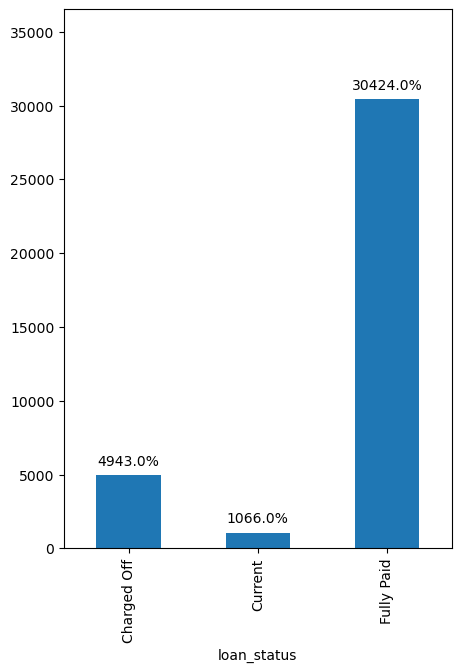

In [249]:
plt.figure(figsize=(5,7))
ax = df.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [250]:
percentage_charged_off = (df.loc[df['loan_status'] == 'Charged Off'].loan_status.count() * 100 / len(df))
print("%.2f" % percentage_charged_off)



13.57


#### Observation
 Approximately 14% of loans in the dataset are defaulted. 

 Any variable that increases percentage of default to higher than 16.5% should be considered a business risk.

 (16.5 is 18% higher than 13.97 - a large enough increase)

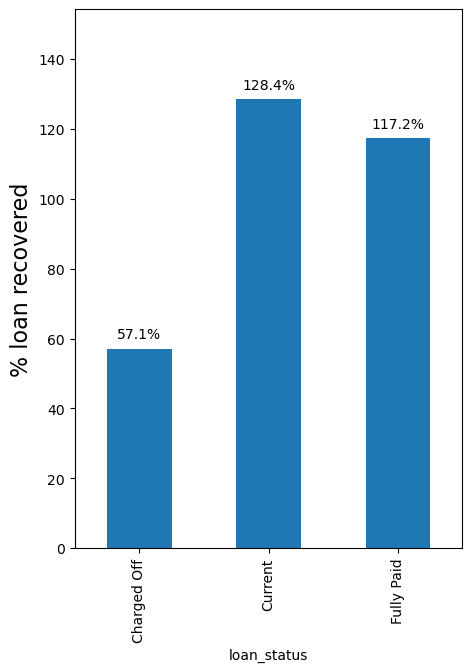

In [252]:
plt.figure(figsize=(5,7))
ax = (df.groupby('loan_status').total_pymnt.sum() * 100 / df.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

#### Observation

Lending Club only recovers 57% of the loan amount when loans are defaulted. 
    
 On fully paid up loans, the company makes 17% profit.

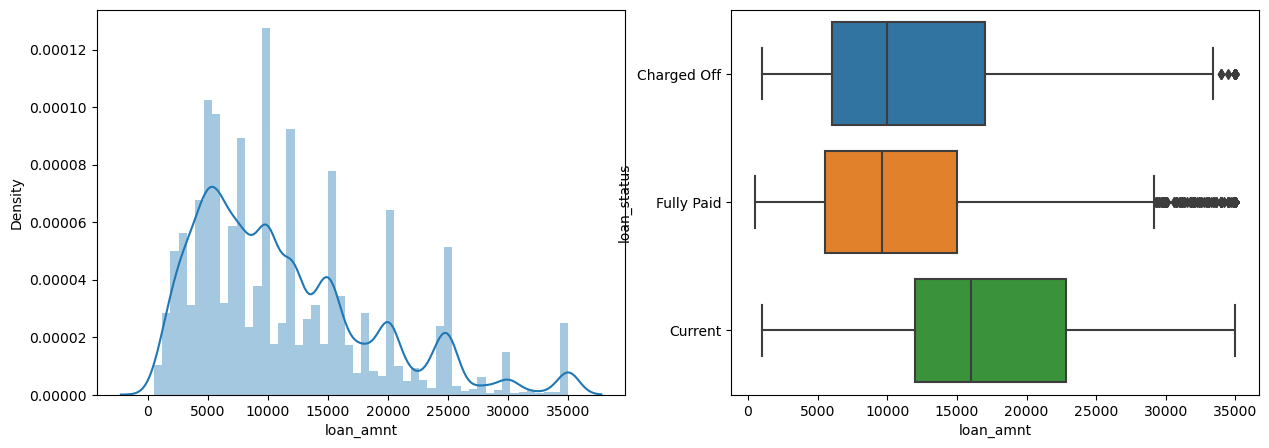

In [254]:
plot_distribution(df, 'loan_amnt')

In [255]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Current,1066.0,17100.703565,8571.093163,1000.0,12000.0,16000.0,22800.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


#### Observation:

Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)

Funding amounts see a spike around each 5000 boundary. We will use 5000 as bucket size for later analysis.

Charged off loans are shifted towards higher average loan amount request.

In [256]:
#Create Derived categorical variable
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], 
 [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k'
                        for x in range (0, 35, 5)])

<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

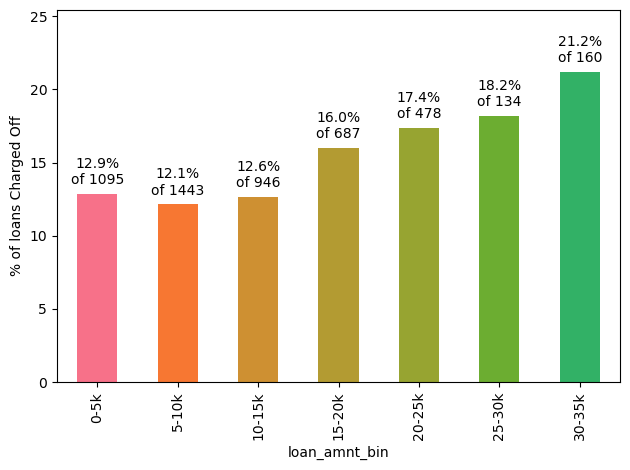

In [257]:
plotLoanStatus(df, 'loan_amnt_bin')

#### Observation :

The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default

#### Other categorical variables distribution

In [258]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

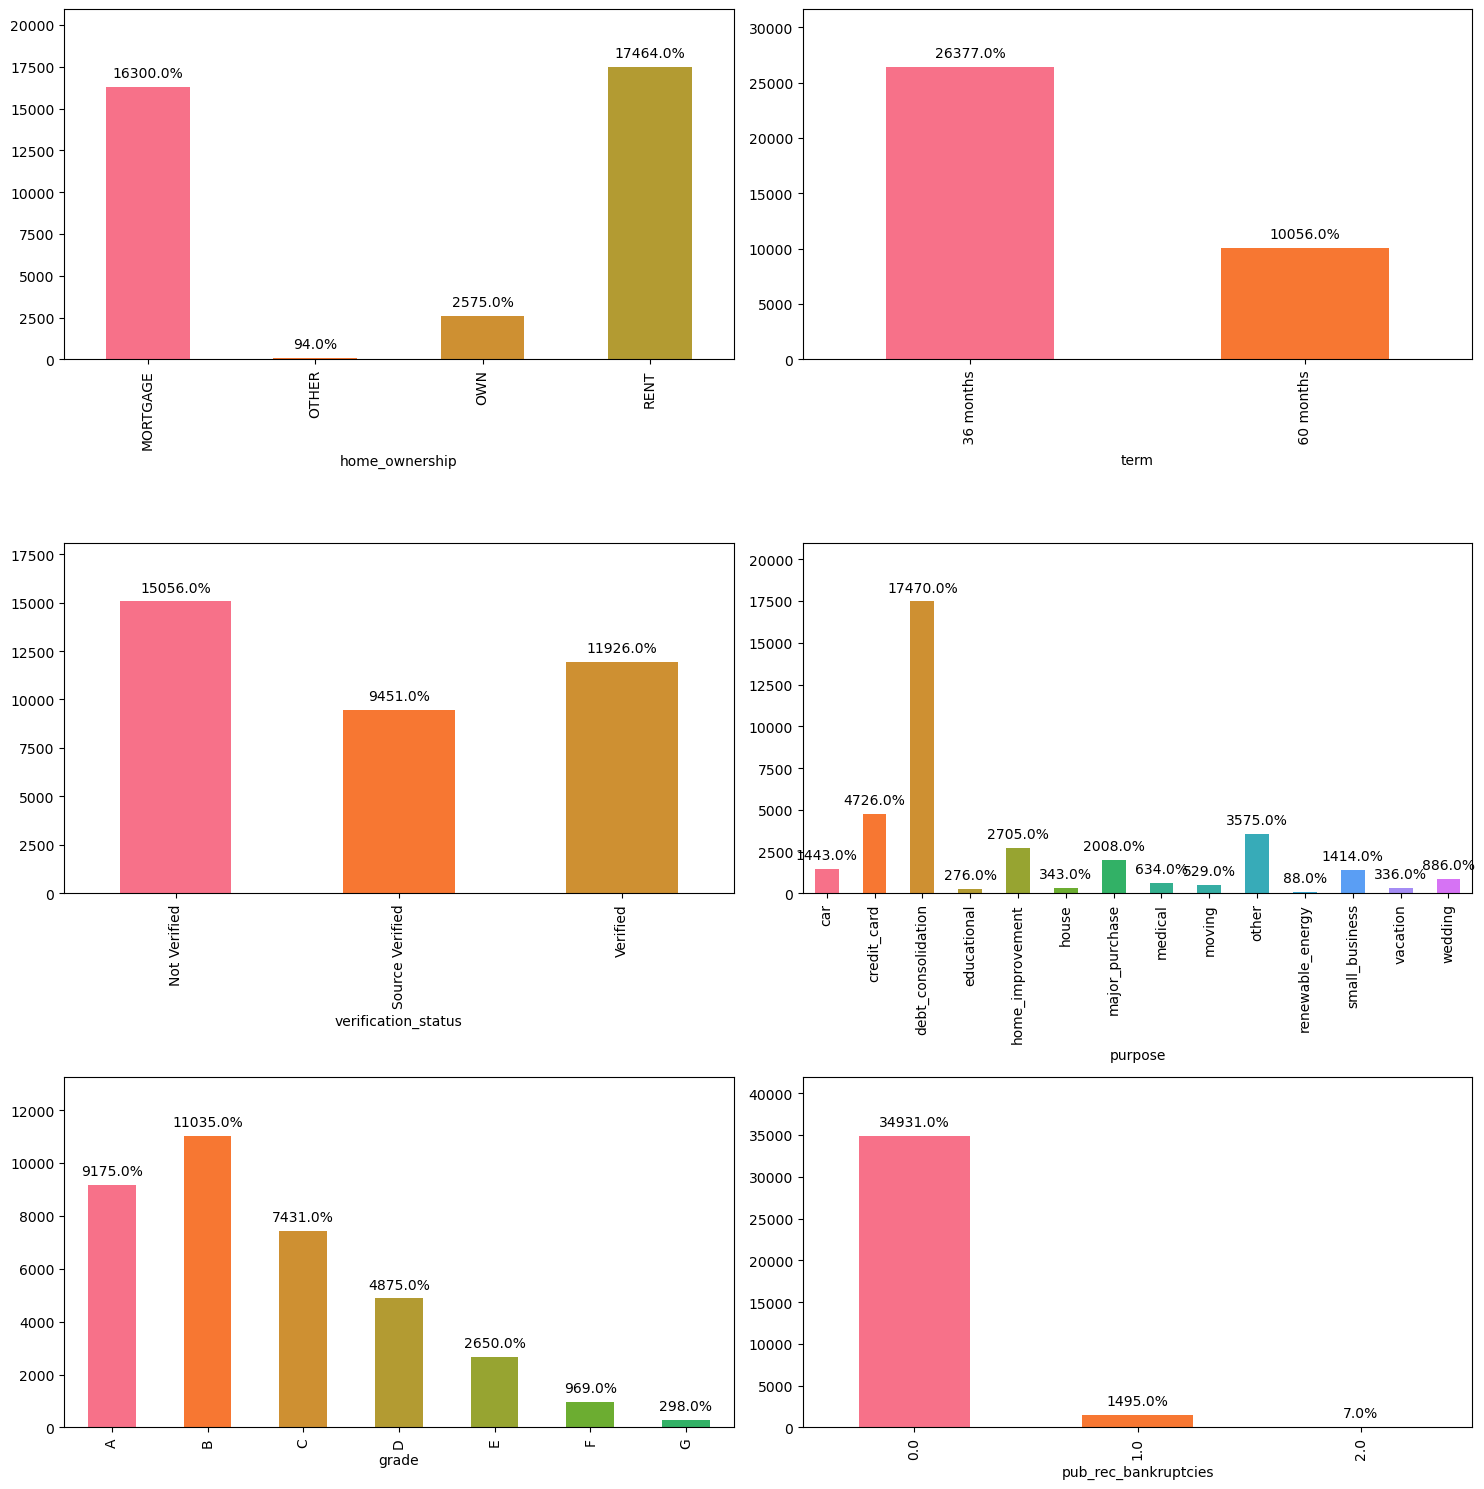

In [259]:
plt.figure(figsize=(15,15))

categoricalBarPlots(df, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

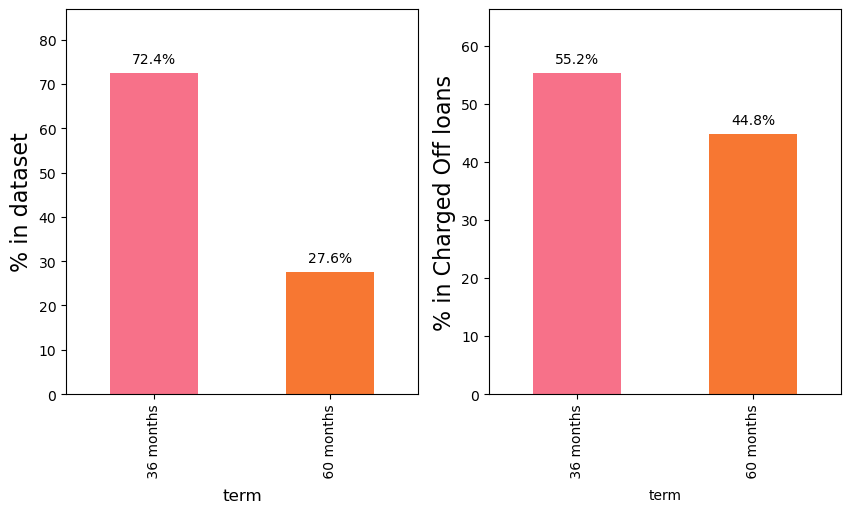

In [260]:
plt.figure(figsize=(10,5))
plot_percentages(df,'term')

#### Observation :

Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.

Among Charged Off loans, percentage of term 60 months rises to 45%. The higher term loans have a higher chance of default.

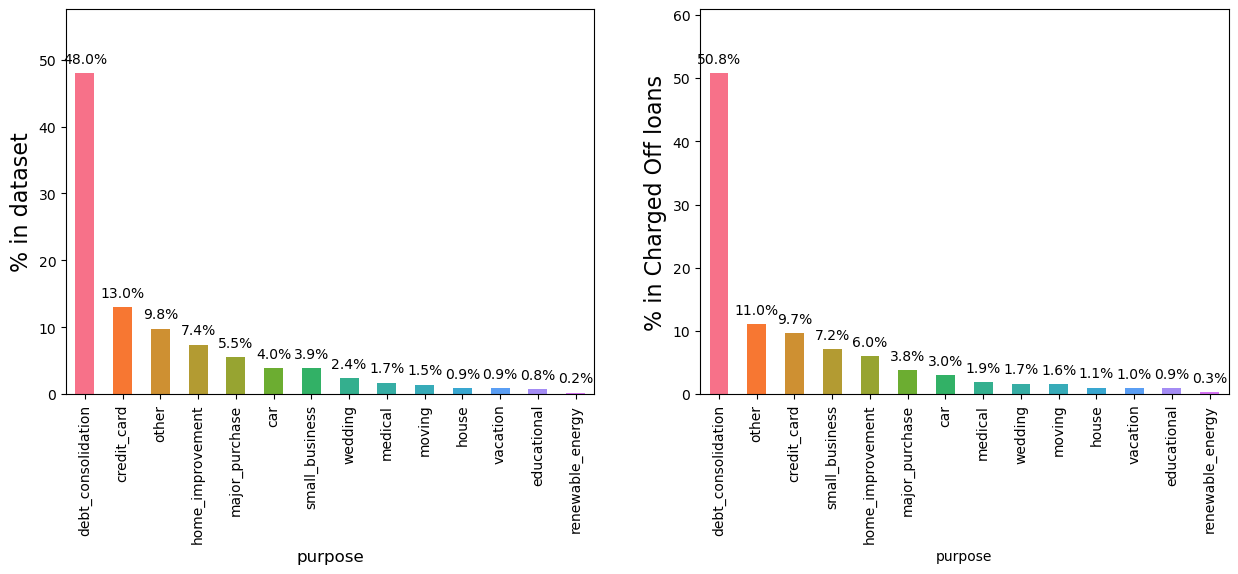

In [261]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'purpose')

#### Observation :

The category small_business percentage doubles from 3.8 to 7.2 for Charged Off loans. Let's see how the categories of this variable behave.

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

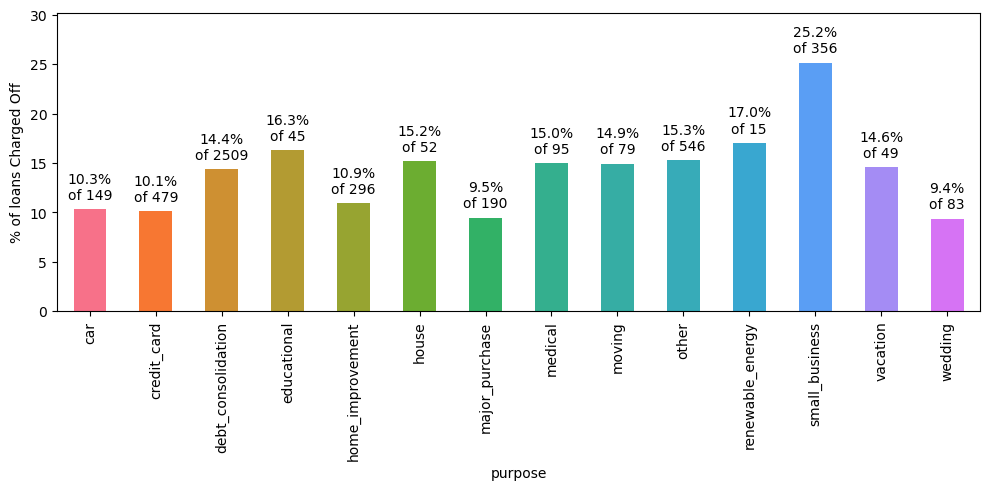

In [262]:
plt.figure(figsize=(10, 5))
plotLoanStatus(df, 'purpose')


#### Observation :

26% of loans for small business are Charged Off. Making them the most risky purpose.

Approximately ~49% of the loans are issued for the purpose of dept consolidation.

17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

##### pub_rec_bankruptcy :  Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

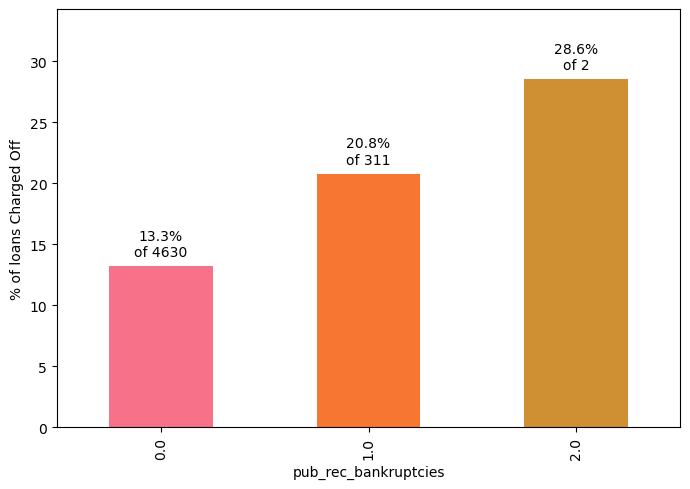

In [263]:
plt.figure(figsize=(7,5))
plotLoanStatus(df, 'pub_rec_bankruptcies')

#### Observation :

The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.

#### int_rate : Interest Rate on the loan.

<Figure size 1500x500 with 0 Axes>

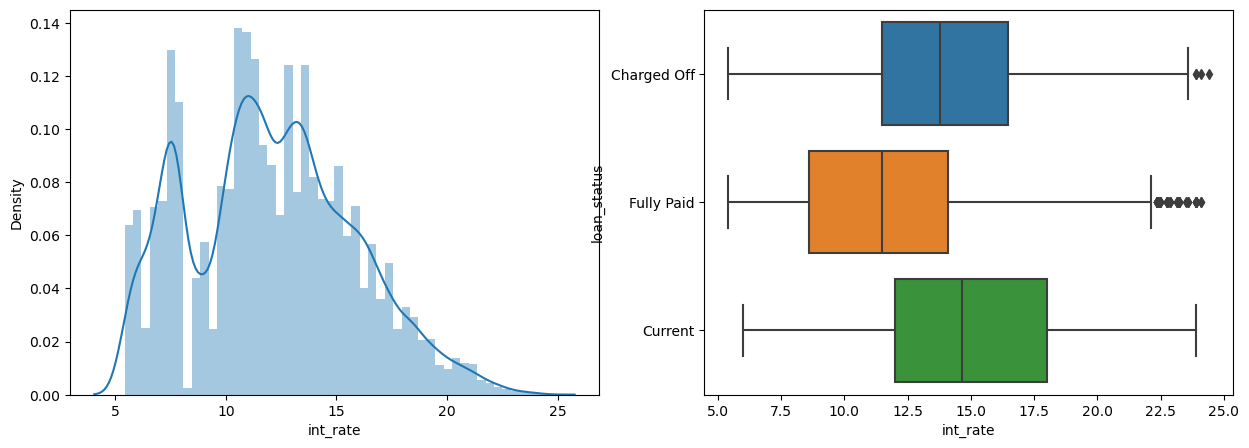

In [264]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'int_rate')

In [265]:
df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Current,1066.0,15.072880,3.556882,6.00,11.99,14.65,17.99,23.91
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


#### grade and sub_grade : LC assigned loan grade and subgrade

In [266]:
df.grade.value_counts()

grade
B    11035
A     9175
C     7431
D     4875
E     2650
F      969
G      298
Name: count, dtype: int64

In [267]:
df.sub_grade.value_counts(normalize=True).head()

sub_grade
B3    0.073395
A4    0.073368
B5    0.069415
A5    0.068921
B4    0.063651
Name: proportion, dtype: float64

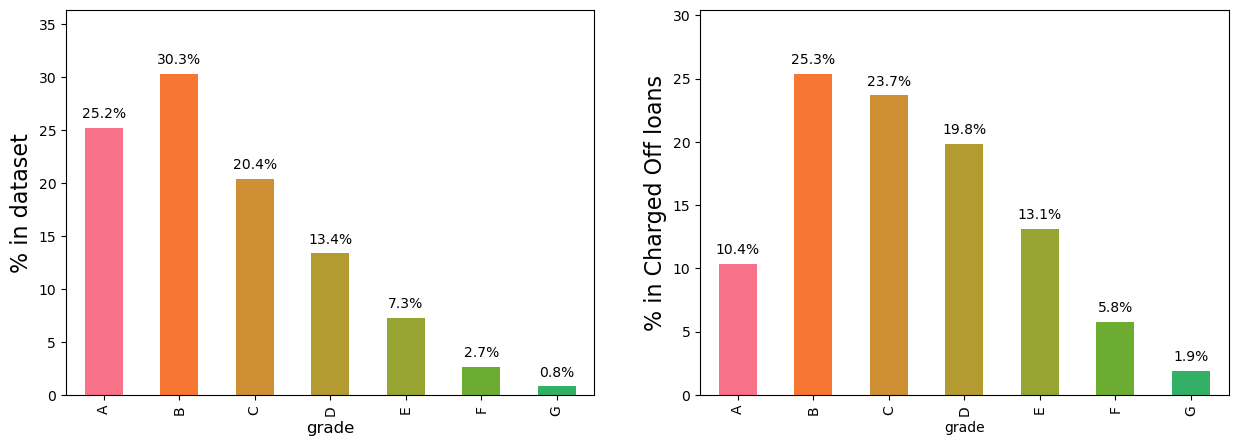

In [270]:
plt.figure(figsize=(15,5))
plot_percentages(df, 'grade', True)

#### Observation :

Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.

Grade D, E, F, G loans are less safe. We should plot grade by percentage Charged Off by category

Lending Clubs grading system is working well.

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

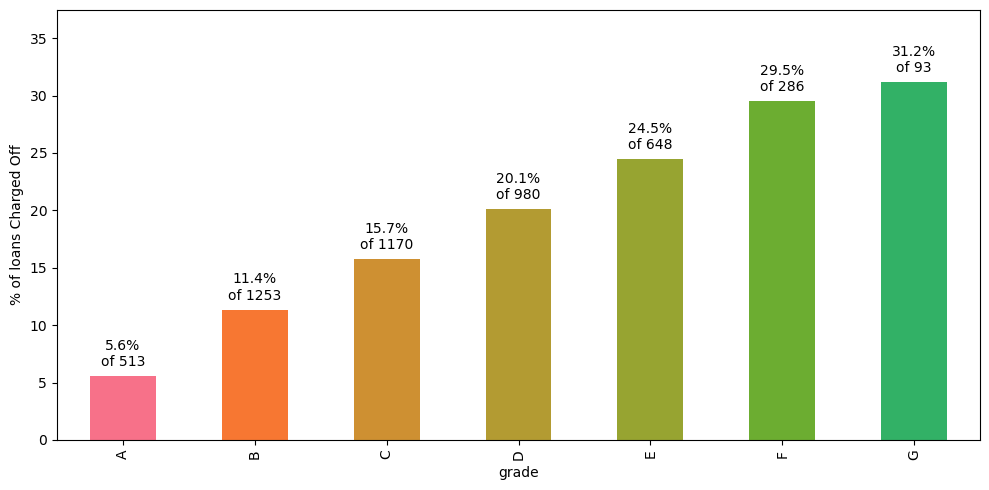

In [272]:
plt.figure(figsize=(10,5))
plotLoanStatus(df, 'grade')

#### Observation :

Nearly 30% of all loans in Grades F and G see a default.

Grade E onwards are risky, and less numerous. Lending Club should either refuse loans or charge high interest rates.

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

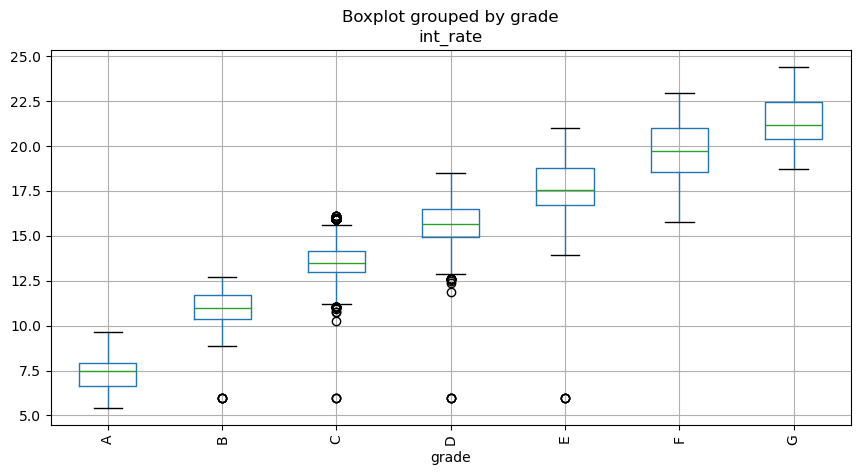

In [273]:
fig, ax = plt.subplots(figsize=(10,5))
df.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

#### Observation :

Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans

#### emp_title : The job title supplied by the Borrower when applying for the loan

In [274]:
top_10_emp_title = df.emp_title.value_counts(normalize=False).head(10)

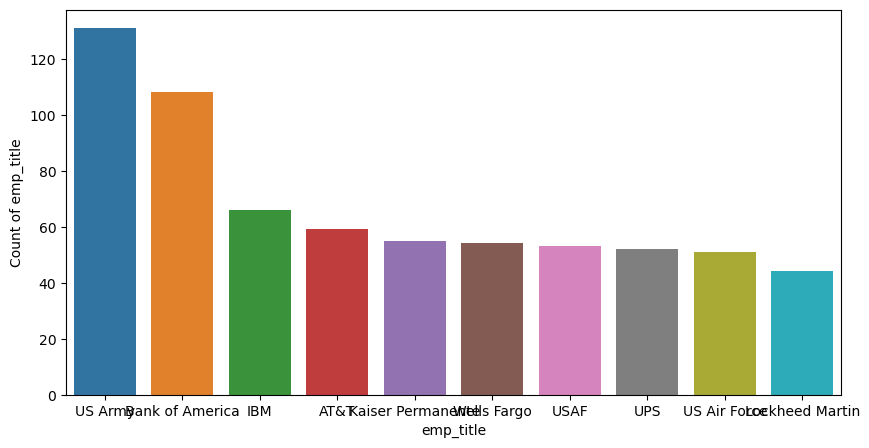

In [275]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top_10_emp_title.index, y=top_10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

#### Observation :

Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.

Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.

The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates

<Axes: xlabel='emp_title', ylabel='% of loans Charged Off'>

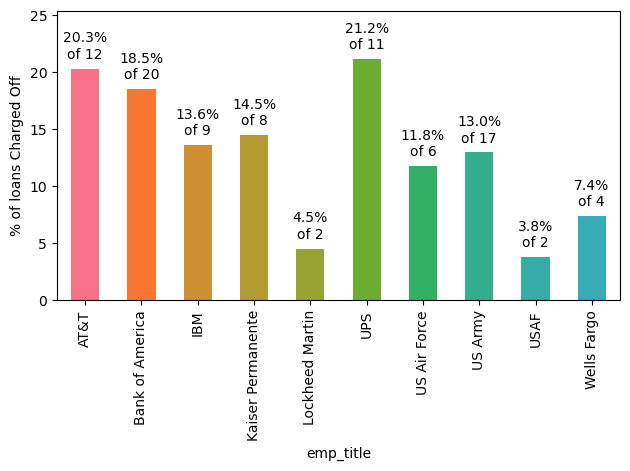

In [276]:
plotLoanStatus(df[df['emp_title'].isin(top_10_emp_title.index.values)], 'emp_title')

#### home_ownership : The home ownership status provided by the borrower during registration

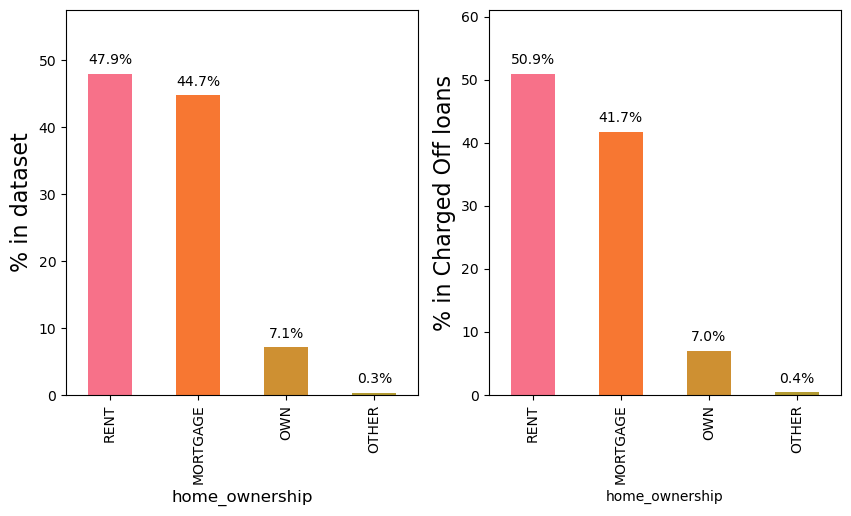

In [278]:
plt.figure(figsize=(10,5))
plot_percentages(df, 'home_ownership')

#### Observation :

There is no impact of home_ownership to default on loan

#### annual_inc : The self-reported annual income provided by the borrower during registration.

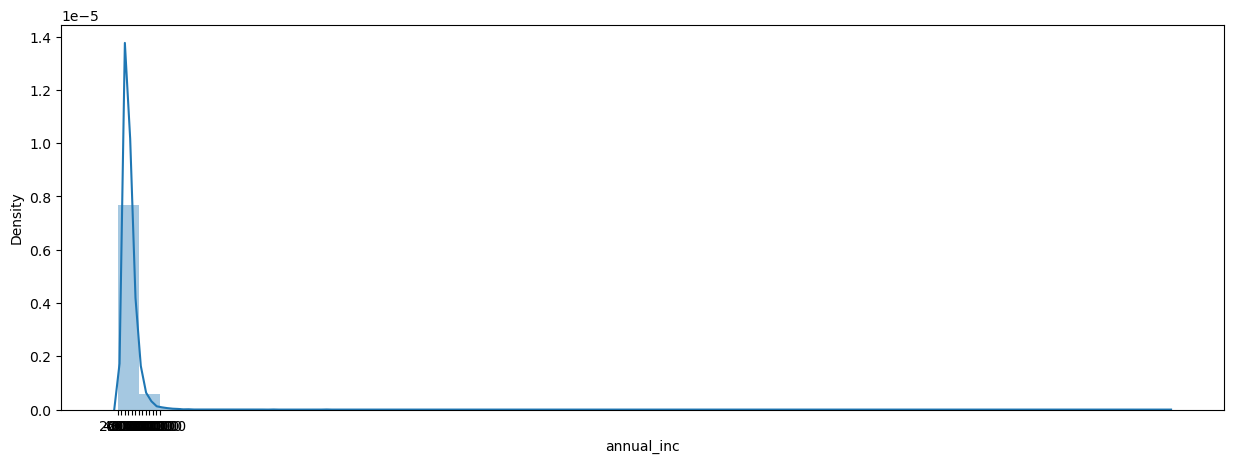

In [280]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [281]:
#Create Derived categorical variable
df['income_bin'] = (df['annual_inc']/20000).astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

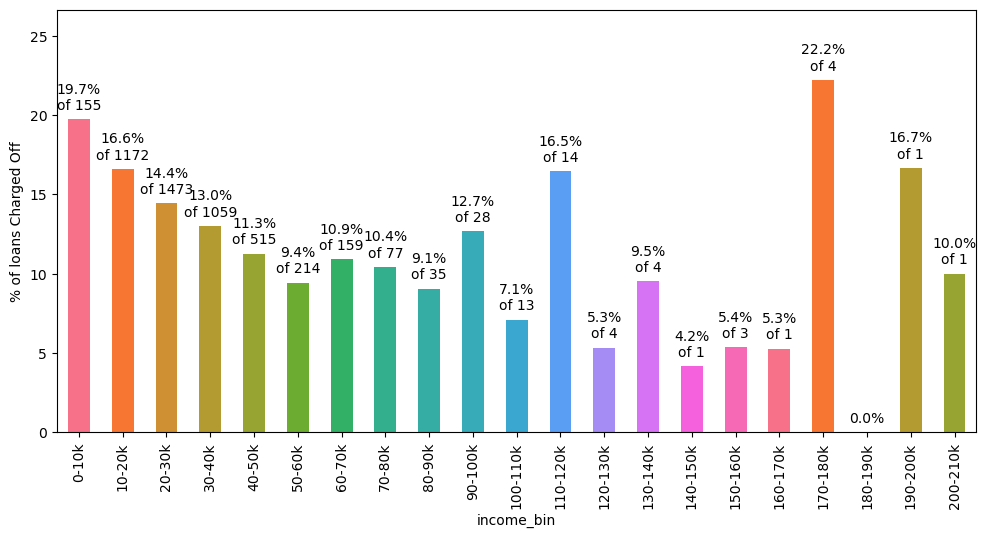

In [283]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(df.loc[df['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') 
                    for x in ax.get_xticklabels()])

#### Observation :

Loan defaults are higher for lower income, and progressively reduce as incomes go up.

It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

#### verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified

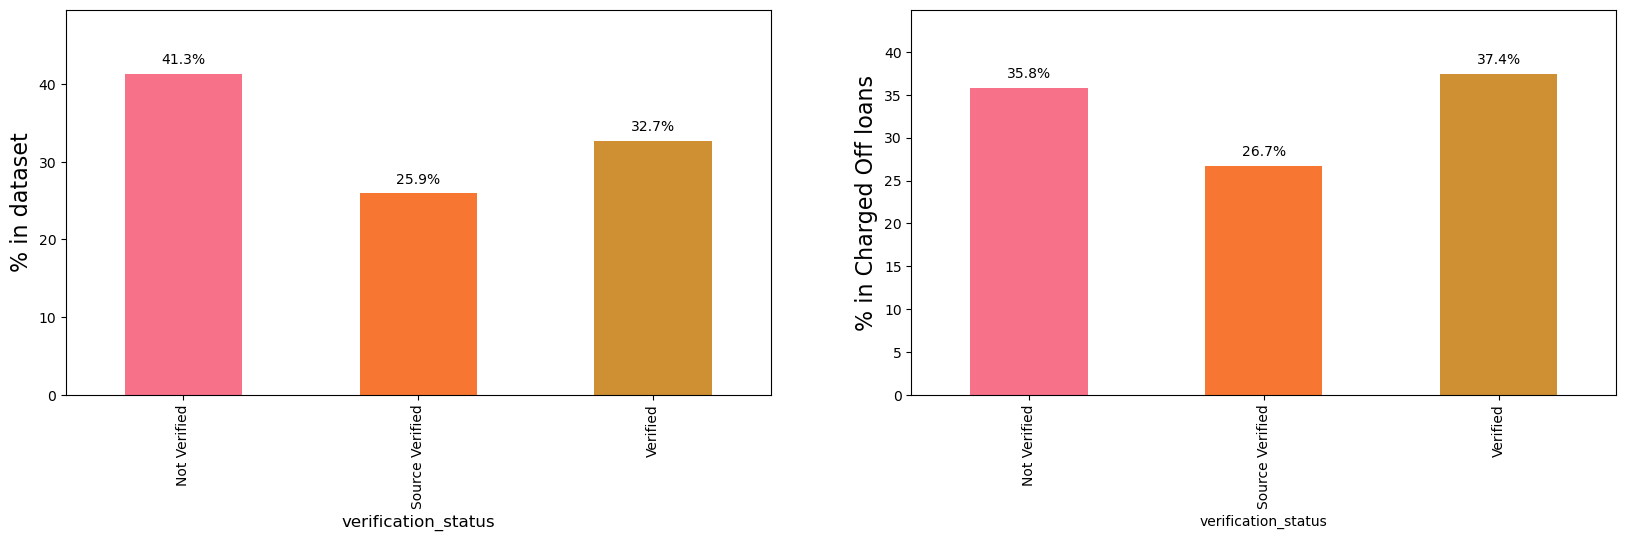

In [284]:
plt.figure(figsize=(20,5))
plot_percentages(df, 'verification_status', True)

#### Observation :

Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.

Verified loans show more charged Off percentage as compared to Not verified loans. This is unexpected and will be investigated later in bivariate analysis

#### title : The loan title provided by the borrower

In [286]:
df.title.value_counts().head(10)

title
Debt Consolidation           2064
Debt Consolidation Loan      1644
Personal Loan                 607
Consolidation                 488
debt consolidation            467
Home Improvement              334
Credit Card Consolidation     333
Debt consolidation            313
Credit Card Loan              296
Personal                      288
Name: count, dtype: int64

#### Observation :

title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column

In [287]:
df = df.drop('title',axis =1 )

#### dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

<Figure size 1000x500 with 0 Axes>

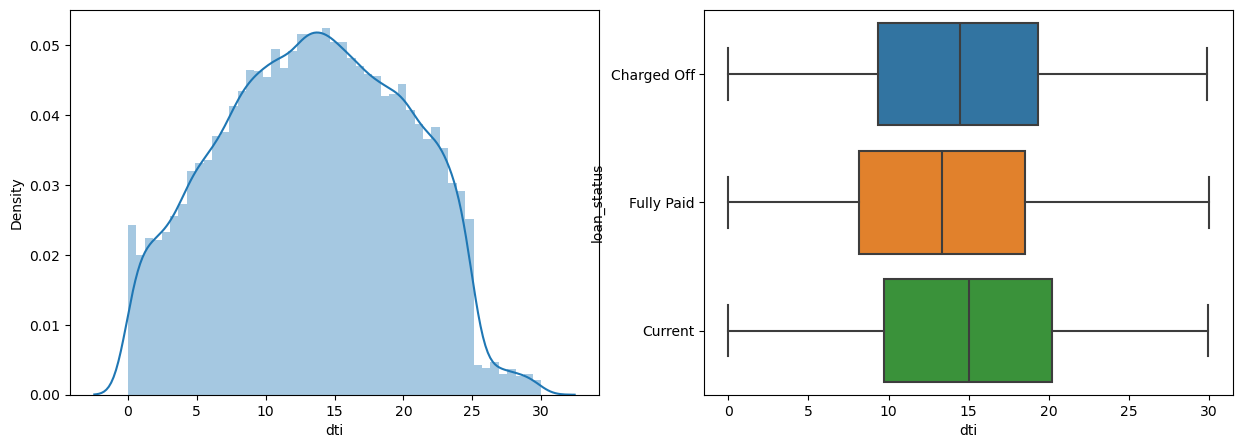

In [288]:
plt.figure(figsize=(10,5))

plot_distribution(df, 'dti')

<Axes: xlabel='dti_bin', ylabel='% of loans Charged Off'>

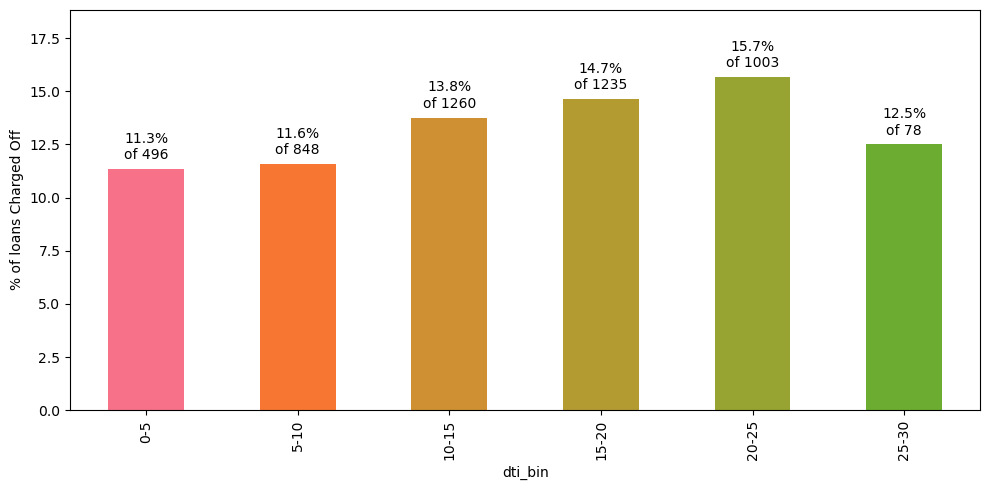

In [289]:
# Create derived variable 
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
plt.figure(figsize=(10,5))
plotLoanStatus(df, 'dti_bin')

#### Observation :

When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off

Higher the dti higher the chances of loan being Charged Off

#### delinq_2yrs : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

<Axes: xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

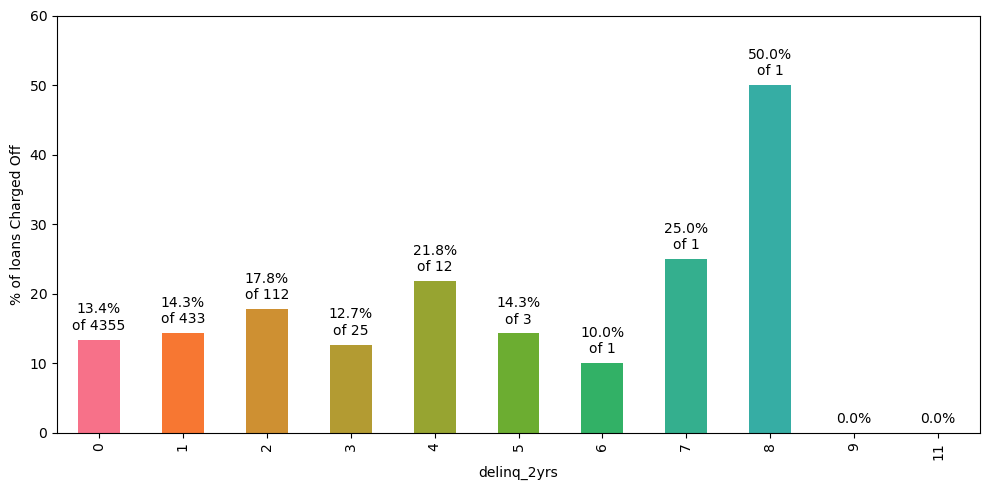

In [290]:
plt.figure(figsize=(10,5))
plotLoanStatus(df, 'delinq_2yrs')

#### Observation :

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.

There are higher chances of default if this variable is greater than 1.

#### total_pymnt : Payments received to date for total amount funded.

In [293]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = df[np.abs(df.total_pymnt-df.total_pymnt.mean()) <= (3*df.total_pymnt.std())]
df['total_pymnt'] = df['total_pymnt'].apply(lambda x : np.log(x))

<Figure size 1500x500 with 0 Axes>

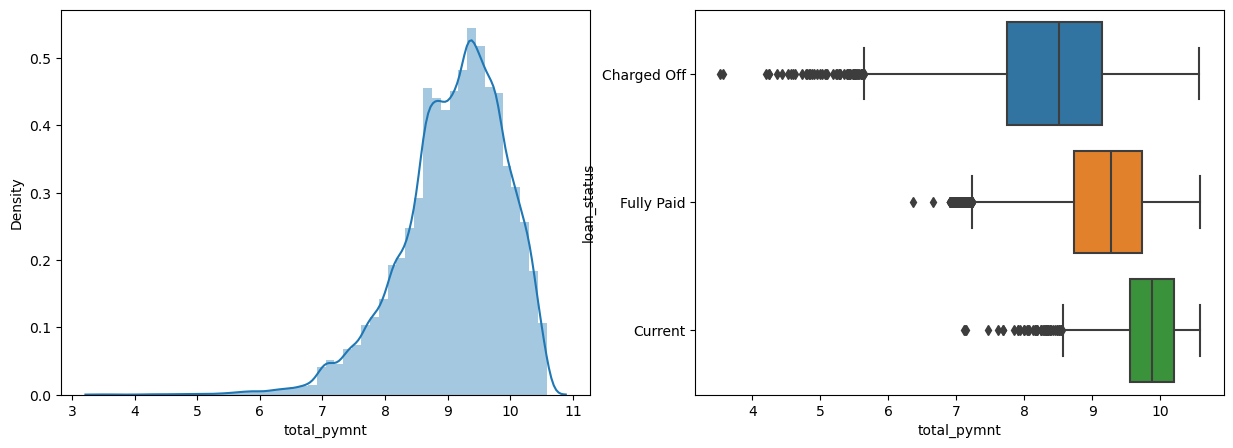

In [294]:
plt.figure(figsize=(15,5))
plot_distribution(df, 'total_pymnt')
plt.show()

#### Observation :

The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.

This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [296]:
df = df.drop('total_pymnt',axis=1)

### Bivariate Analysis

#### loan_amnt over time

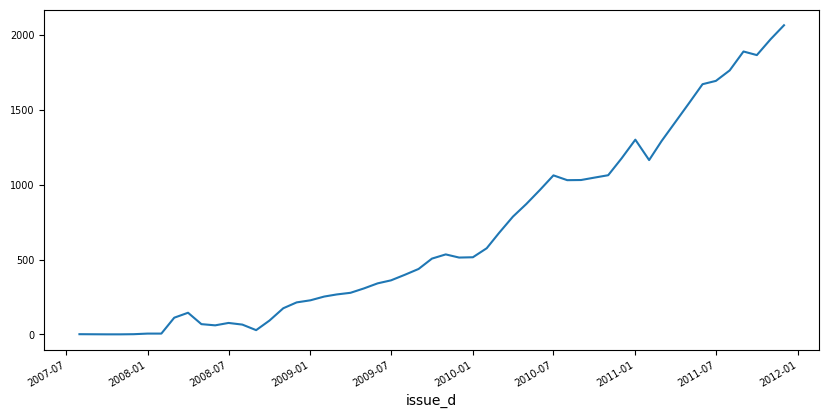

In [304]:
plt.figure(figsize=(10,5))
df.groupby('issue_d').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

#### Avg. loan_amnt over time

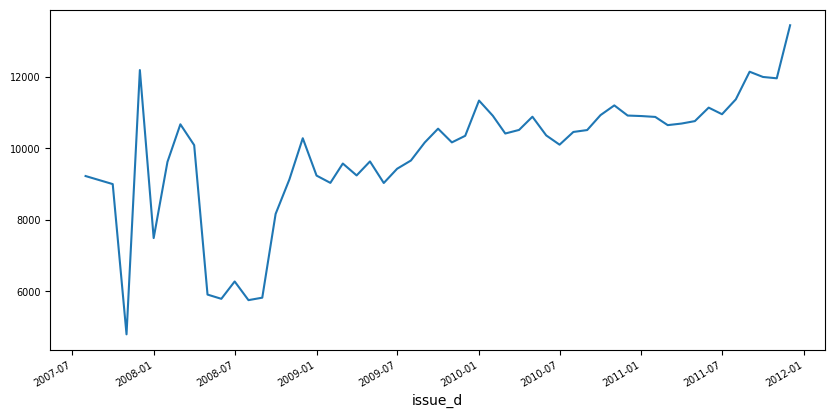

In [305]:
plt.figure(figsize=(10,5))
df.groupby('issue_d').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

#### Observation :

Average loan amount dropped sharply in year 2008

#### loan_amnt vs grade

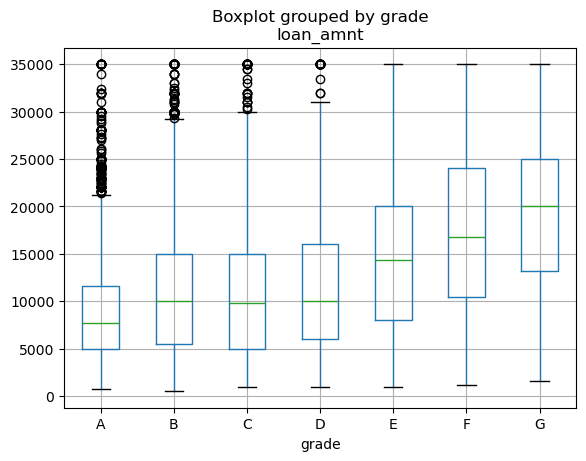

In [309]:
df.boxplot(column='loan_amnt', by='grade')
plt.show()

#### Observation :

Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

#### loan_amnt vs verification_status vs loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

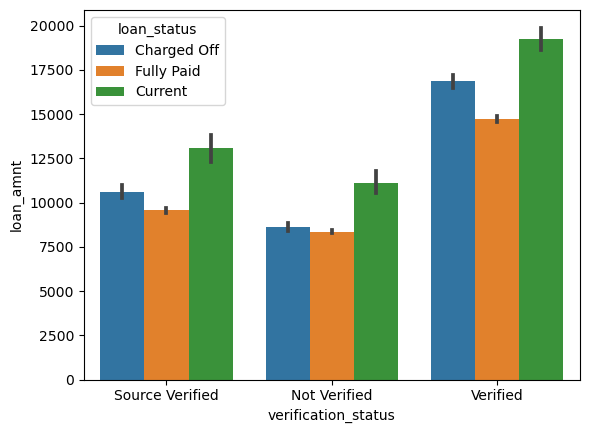

In [310]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=final_loan, estimator=np.mean)

#### Observation :

Higher loan amounts are Verified more often.
    
We already know that larger loans are less in number, but see a higher charge off rate.
    
This, combined with previous observation, explains why verfied loans see a higher rate of default. It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.

#### Interest Rate and Term

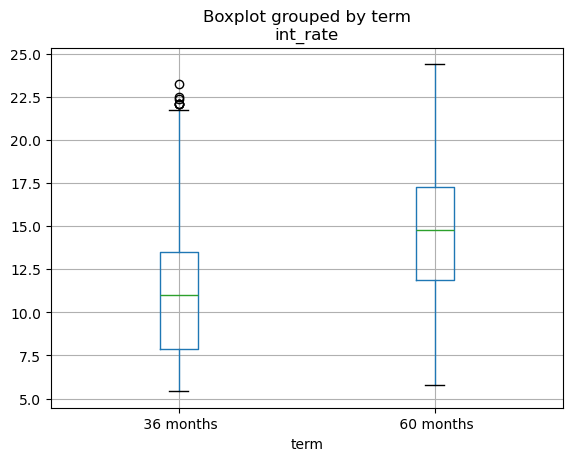

In [312]:
df.boxplot(column='int_rate', by='term')
plt.show()

#### Observation :

Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

#### int_rate vs loan_status

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

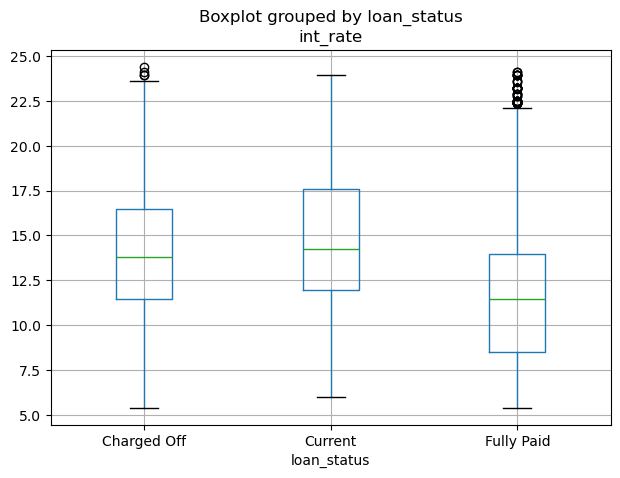

In [315]:
df.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

#### Observation :

Loans at a higher intrest rate are more likely to be Charged Off

<Axes: >

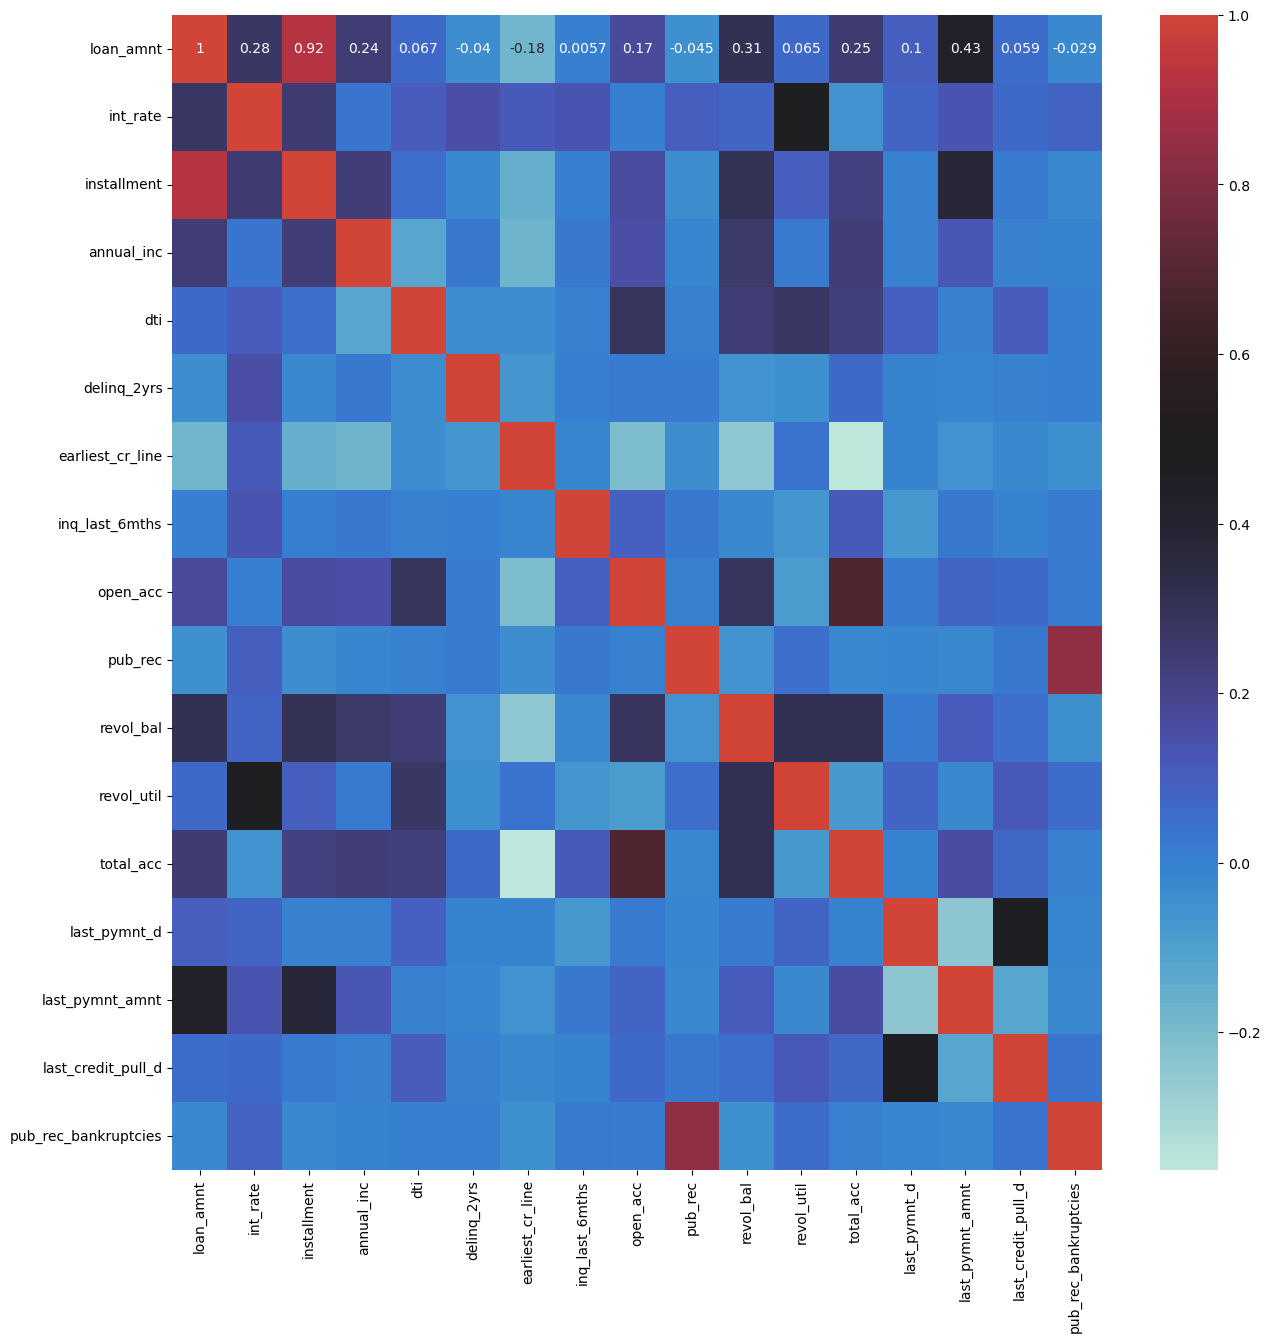

In [318]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
        'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

#### Observation :

loan_amnt is correlated to last_payment_amount , as expected

int_rate is correlated to revol_util  - This is good, as company is charging higher interest from riskier loan.

loan_amnt revol_bal are correlated  - This is not good as it suggests that higher loan amount is being approved to riskier borrowers
    
delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.